In [ ]:
import numpy as np
from keras.callbacks import LambdaCallback, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

In [ ]:
with open ("Ed sheeran lyrics.txt",encoding="utf8") as f:
    data=f.read()

In [ ]:
corpus = data.lower().split("\n")

In [ ]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 18, 100)           132600    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 18, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 18, 300)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_8 (Dense)              (None, 663)               133263    
_________________________________________________________________
dense_9 (Dense)              (None, 1326)              880464    
Total params: 1,768,327
Trainable params: 1,768,327
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
294/294 [==============================] - 3s 12ms/step - loss: 6.3164 - accuracy: 0.0387
Epoch 2/200
294/294 [==============================] - 3s 12ms/step - loss: 5.5545 - accuracy: 0.0403
Epoch 3/200
294/294 [==============================] - 3s 12ms/step - loss: 5.3807 - accuracy: 0.0557
Epoch 4/200
294/294 [==============================] - 3s 12ms/step - loss: 5.1897 - accuracy: 0.0686
Epoch 5/200
294/294 [==============================] - 3s 12ms/step - loss: 4.9954 - accuracy: 0.0896
Epoch 6/200
294/294 [==============================] - 3s 12ms/step - loss: 4.8134 - accuracy: 0.1147
Epoch 7/200
294/294 [==============================] - 3s 12ms/step - loss: 4.6524 - accuracy: 0.1308
Epoch 8/200
294/294 [==============================] - 3s 12ms/step - loss: 4.5203 - accuracy: 0.1477
Epoch 9/200
294/294 [==============================] - 3s 12ms/step - loss: 4.4013 - accuracy: 0.1602
Epoch 10/200
294/294 [==============================] - 3s 12ms/step - loss: 4.292

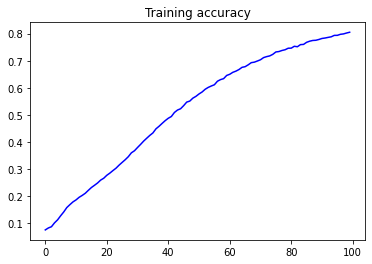

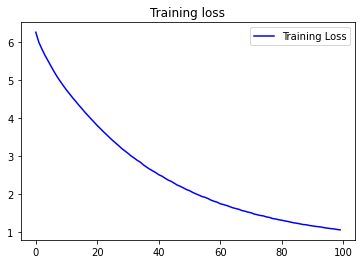

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "HOw to get away"
next_words = 15
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

HOw to get away the village bum took an icezcream and two gulls eating it and then would do
